<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.4 Maximum Likelihood Estimation

##2.4.1 MLE for Random Samples

Maximum likelihood estimation is a method of estimating the parameters of a probability distributon that most closely match a dataset. The goal of MLE is to find parameters which maximize the "likelihood function" of the data. The liklihood function equates the probability of finding sample data given particular parameters.


Equation where f is a propability density function:

f (x1, x2, . . . , xn|
θ1, . . . ,
θm)


Where θ1 and θm are random parameter values and x1, xn are datapoints. Maximum Likelihood estimation generates a funciton with different parameter values θ1, . . . , ˆ
θm such that:


f (x1, . . . , xn| ˆ
θ1, . . . , ˆ
θm
) ≥ f (x1, . . . , xn|
θ1, . . . ,
θm) for all
θ1, . . . ,
θm


For example, given a function with the normal distribution:

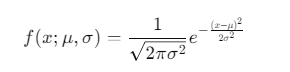

The likelihood function would be the product of all xn plugged into the function:

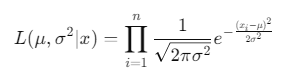

Estimated Mean: 10.035829234430862
Estimated Standard Deviation: 3.134508808694705


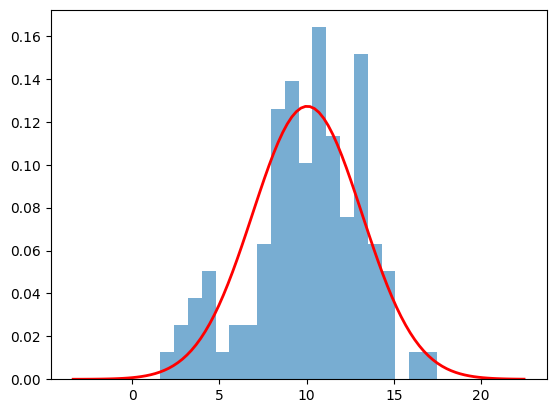

In [73]:
#MLE example
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt


data = np.random.normal(10,3,100) #creating 100 random data samples off a normal dist with a mean of 10 and a std of 3

def MLE(parameters, data): #returns probability that the data is within the parameters for std and data
  mean,std = parameters
  likelihood = np.zeros(data.size)#creating empty array to fill likelihood data for all datapoints
  for i in range(data.size): #looping through all datapoints
    likelihood[i] = (1 / (math.sqrt(2 * math.pi * (std ** 2)))) * math.exp((-math.pow(data[i] - mean, 2)) / (2 * (std ** 2)))#calculating liklihood based on normal distribution for each datapoint
  return np.prod(likelihood) #returning product of likelihood for all datapoints

guess = [np.mean(data), np.std(data)] #initial guess of mean and std based off data
result = minimize(lambda params: -MLE(params, data), guess) #minimizing -MLE (maximizing) to find parameters which most closely fit the data depending on an initial guess, returns an array result.x which contains the mean and std

print("Estimated Mean:", result.x[0])
print("Estimated Standard Deviation:", result.x[1])

plt.hist(data, bins=20, density=True, alpha=0.6)
x = np.linspace(min(data) - 5, max(data) + 5, 100)
pdf = (1 / (math.sqrt(2 * math.pi * result.x[1]**2))) * np.exp(-((x - result.x[0])**2) / (2 * result.x[1]**2))
plt.plot(x, pdf, 'r-', linewidth=2)
plt.show() #creating a plot for the datapoints as well as the probability distribution function


##2.4.2 Linear Regression

Linear regression aims to estimate the coefficients of a linear equation based on observed data. Let y be a variable which can be represented as the linear combination:

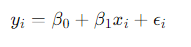

Where ϵ is assumed to have a normally distributed error

The maximum likelihood estimation can be used to estimate these coefficents given that the data has a normally distruted error

For a given,
μ,
σ 2, the probability that n points is observed is represented by the likelihood function:

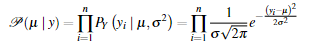

Estimated Intercept: 3.2016207236487815
Estimated Slope: 9.893678357341493
Estimated STD, -0.0012566594074836512


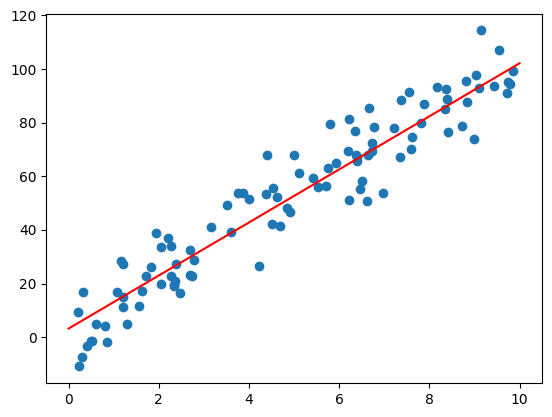

In [74]:
#example of Linear Regression with MLE

X = np.random.rand(100) * 10 #creating 100 random X variables
slope = 10 #actual slope of data
intercept = 4 #actual intercept of data
std = 10
Y = slope * X + intercept + np.random.normal(0, std, 100) #function Y with a normally distributed error of mean 0 , std 1
#setting mean to zero to center most of the datapoints around the linear function. However, there will still be variance with the standard deviation

def MLE(parameters, X,Y): #returns probability that the data is within the parameters for std and data
  intercept, slope, std = parameters
  predict = intercept + slope * X #calculate predicted values based off parameters passed to function
  likelihood = np.zeros(Y.size)#creating empty array to fill likelihood data for all datapoints
  for i in range(Y.size): #looping through all datapoints
    likelihood[i] = (1 / (math.sqrt(2 * math.pi * (std ** 2)))) * math.exp((-math.pow(Y[i] - predict[i], 2)) / (2 * (std ** 2)))
    #calculating liklihood based on normal distribution for each datapoint
  return np.sum(likelihood) #returning product of likelihood for all datapoints

guess = [intercept, slope, std] #initial guess of given slope and intersept

result = minimize(lambda params: -MLE(params, X, Y), guess)
#minimizing -MLE (maximizing) to find parameters which most closely fit the data depending on an initial guess, returns an array result.x which contains the intercept, slope, and standard deviation

estIntercept = result.x[0]
estSlope = result.x[1]
estStd = result.x[2]

print("Estimated Intercept:", estIntercept)
print("Estimated Slope:", estSlope)
print("Estimated STD,", estStd)

plt.scatter(X, Y, label='Data points')
x_line = np.linspace(0, 10, 100)
y_line = estIntercept + estSlope * x_line
plt.plot(x_line, y_line, color='red')
plt.show()
